# PROJECT:Auto mpg

In [1]:
#Import the required Libraries
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Lets create a dataframe from given csv file
df= pd.read_csv('auto-mpg.csv')


In [3]:
#Lets check the shape of the data
df.shape


(398, 9)

In [4]:
#Lets see the first 5 rows of the data
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
# Lets check the datatypes
df.dtypes 


mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [6]:
#Lets get more details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [7]:
# Its mentioned that the horsepower power column has 6 missing values with ?, lets check it
df[df['horsepower']=='?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [8]:
# Lets replace? with NaN
df['horsepower'].replace('?',np.NaN,inplace=True)


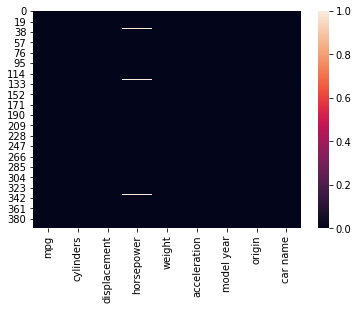

In [9]:
#lets checking the missing values Nan
sns.heatmap(df.isnull())
plt.show()
#Now we can see missing values in colum horse power

In [10]:
# Lets confirm about missing value once more
df.isnull().sum()
#Hence we are now sure there are 6 missing values

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [11]:
#Lets drop the missing values
df.dropna(inplace=True)

In [12]:
#Lets check the missing values again
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [13]:
#It is mentioned  in the dataset that horsepower and weight are continuos so lets change them in continuous
convert = {'horsepower':float,'weight':float}
df = df.astype(convert)
print(df.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object


In [14]:
# Lets see the descriptive statistics
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [15]:
#Lets see the correlation among the different features as well as with target
df.corr()
# we can  see there is  positive correlation of mpg variable with few input features while negative correlation with few others

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


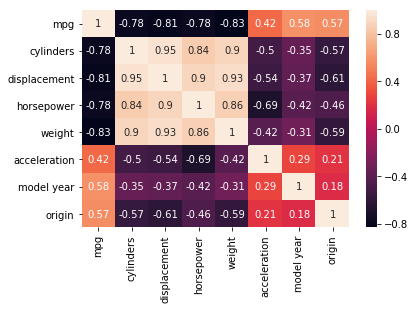

In [16]:
# lets visualize the correlation with heat map
sns.heatmap(df.corr(), annot = True)
#we can see that mpg has  strong negative correlation with few variables and positive correlation with others
#Also cylinders,displacement and weight have high positive correlation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000001E61B66780>,
      dtype=object)

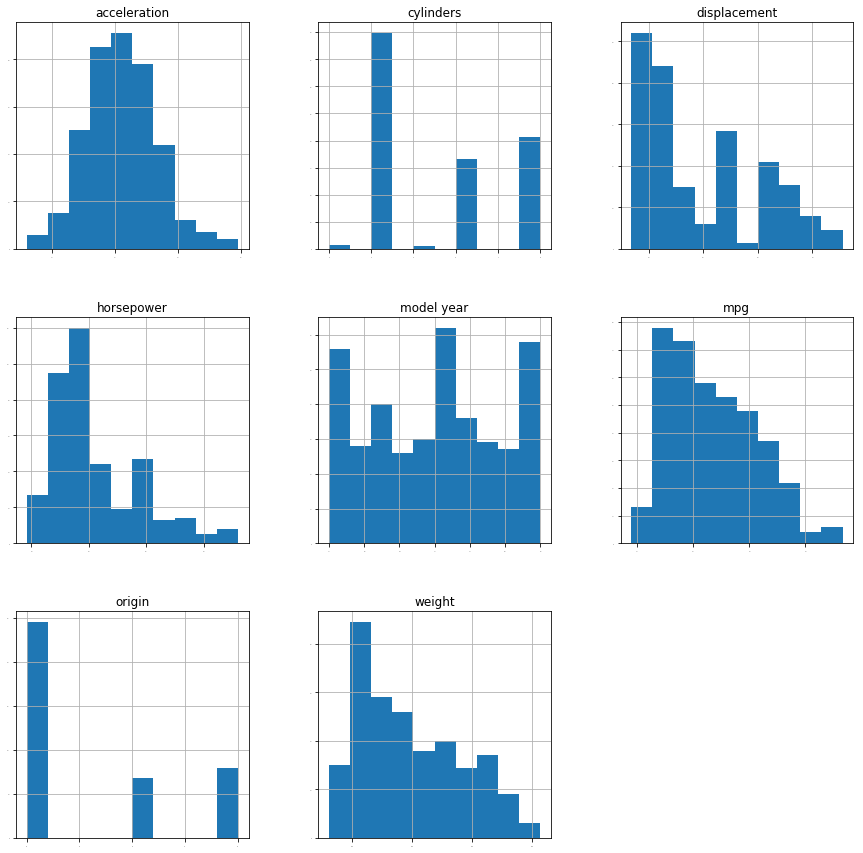

In [17]:
#Lets visualize distribution of numeric data
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1,   figsize=(15,15))
#we can see the skewness in the data and mostly are right skewed
# we will deal with it later using transformation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000001E624C7240>,
      dtype=object)

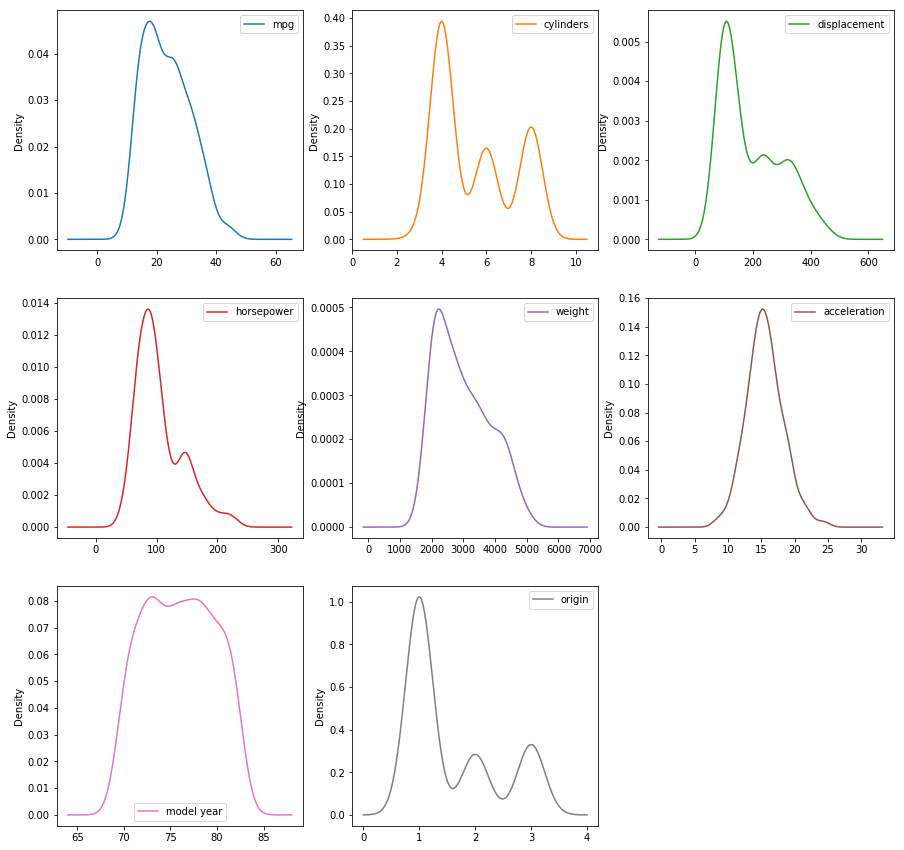

In [18]:
# # Univariate Density Plots of all numeric variables
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=(15,15))

mpg                 AxesSubplot(0.125,0.71587;0.133621x0.16413)
cylinders        AxesSubplot(0.285345,0.71587;0.133621x0.16413)
displacement      AxesSubplot(0.44569,0.71587;0.133621x0.16413)
horsepower       AxesSubplot(0.606034,0.71587;0.133621x0.16413)
weight           AxesSubplot(0.766379,0.71587;0.133621x0.16413)
acceleration       AxesSubplot(0.125,0.518913;0.133621x0.16413)
model year      AxesSubplot(0.285345,0.518913;0.133621x0.16413)
origin           AxesSubplot(0.44569,0.518913;0.133621x0.16413)
dtype: object

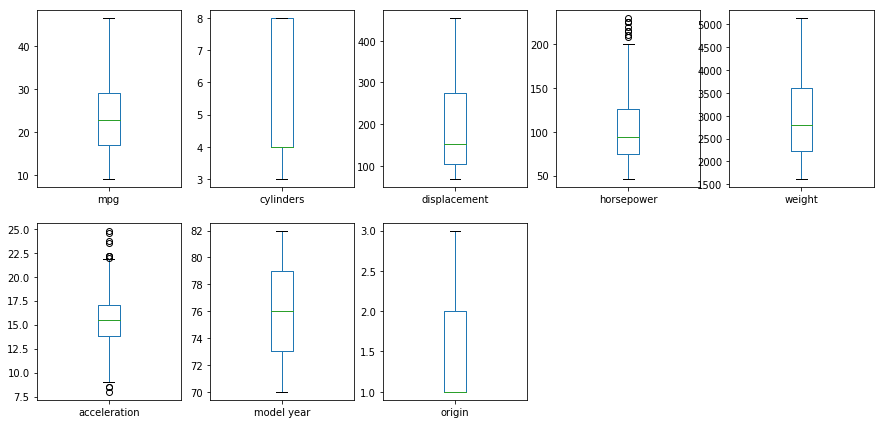

In [19]:
#Lets plot the box plot of each numeric variable
df.plot(kind='box', subplots=True, layout=(4,5), sharex=False, sharey=False, figsize=(15,15))
# we can see the outliers in horsepower and acceleration column

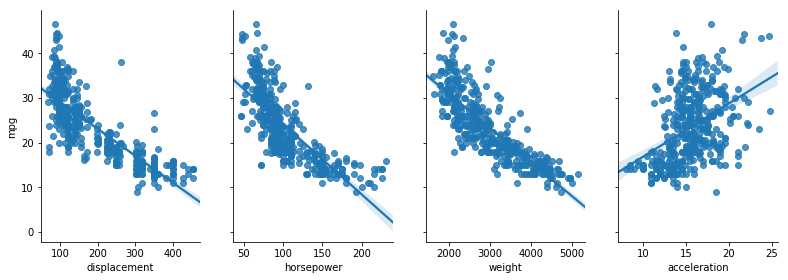

In [20]:
#Lets explore the relation of mpg variable with 4 continuos features  'displacement', 'horsepower', 'weight',  'acceleration'
sns.pairplot(df, x_vars=['displacement', 'horsepower', 'weight','acceleration'], size=4, aspect=0.7, y_vars='mpg',  kind='reg')


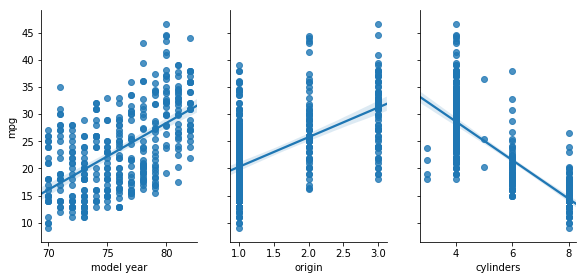

In [21]:
#Lets explore the relation of win variable with  next 3  features 'model year', 'origin', 'cylinders'
sns.pairplot(df, x_vars=['model year', 'origin', 'cylinders'], y_vars='mpg', size=4, aspect=0.7, kind='reg')
# we can see negative relation between mpg and cylinders
# we can see postive relation between mpg and model year and origin

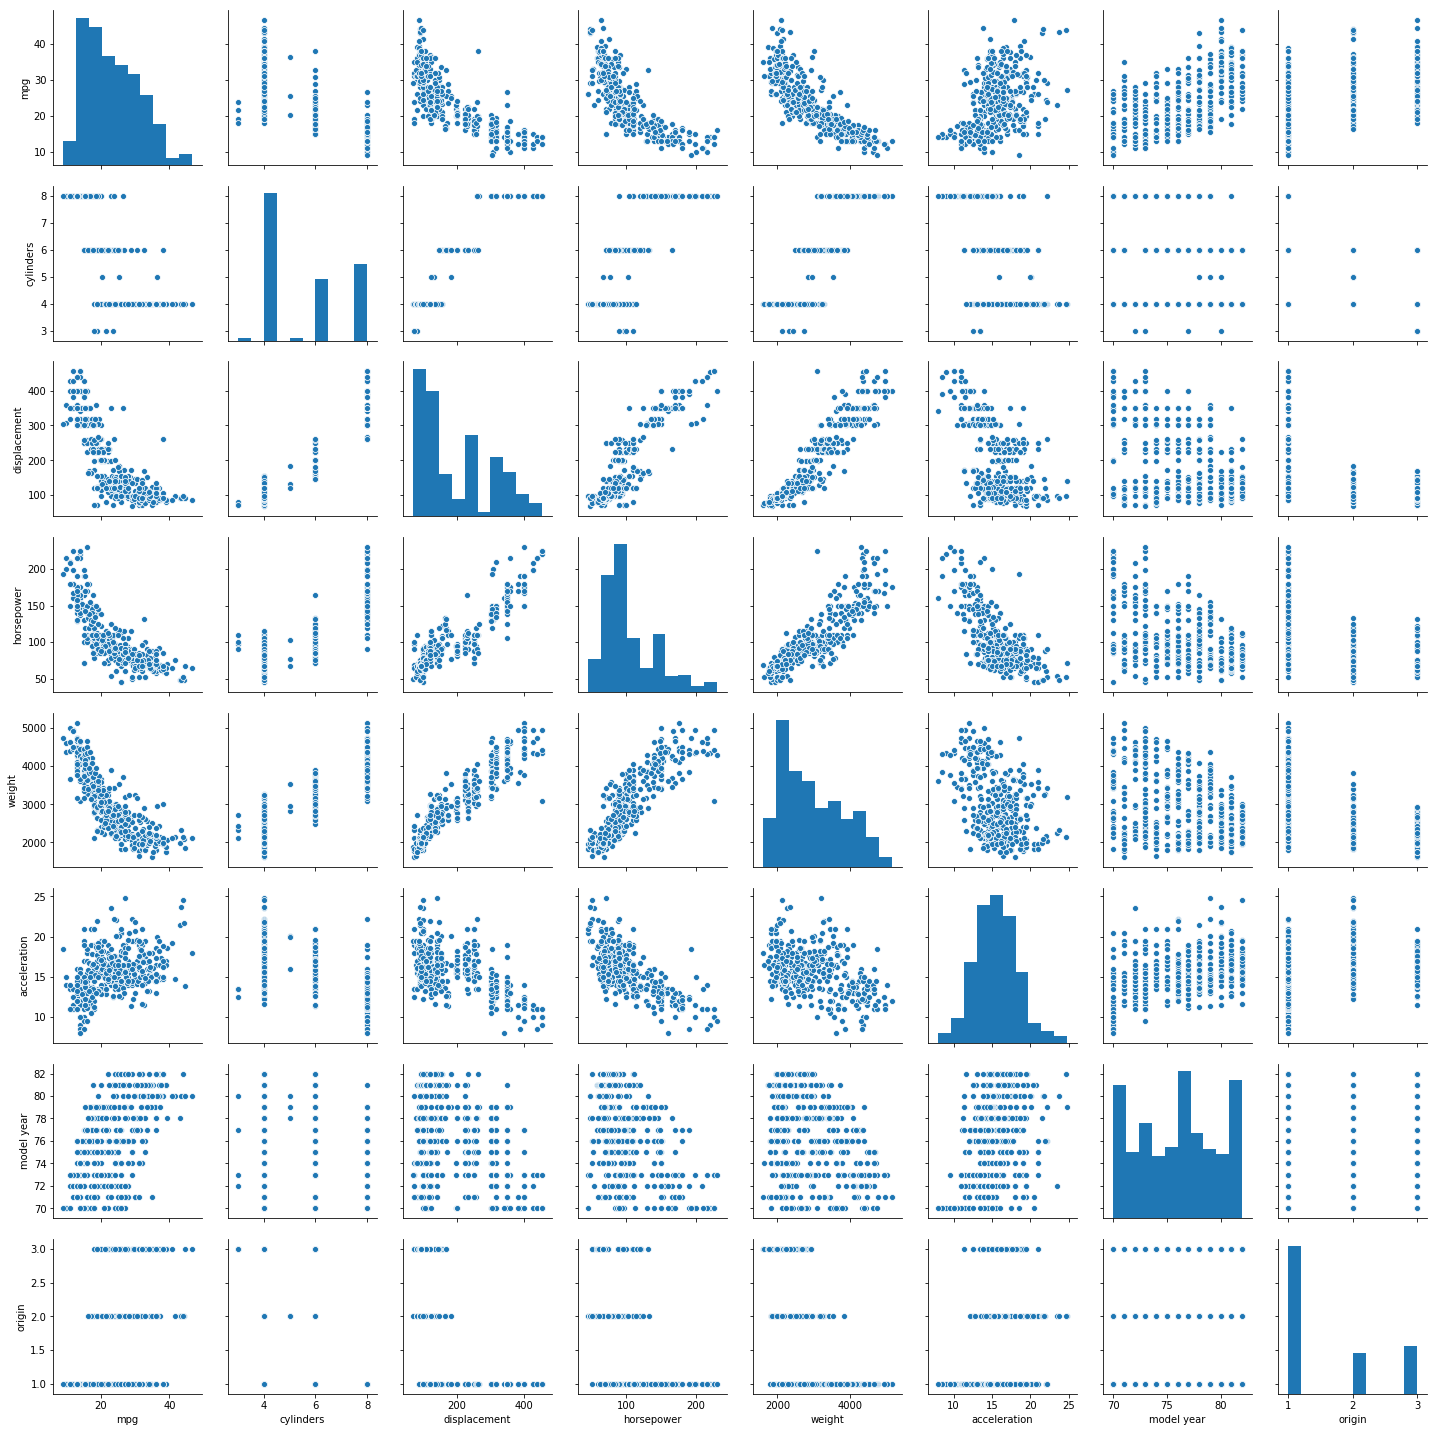

In [22]:
#Lets visualize the relation among all variables
sns.pairplot(df)

In [23]:
#As the car name is unique value for each entry, lets drop it
df.drop('car name', axis=1, inplace =True)

In [24]:
#Lets check the skewness of numeric data
df.skew()
#There is positive skewnewss in few variables lets remove them

mpg             0.457092
cylinders       0.508109
displacement    0.701669
horsepower      1.087326
weight          0.519586
acceleration    0.291587
model year      0.019688
origin          0.915185
dtype: float64

In [25]:
# Let us reduce the Skewness with log as it is postively skewed
for col in df.columns:                                      
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [26]:
#Lets check skewness in data
df.skew()
# for several variables skewness has beeb brought in acceptable range, except in origin varibales 
# so lets proceed

mpg             0.457092
cylinders       0.508109
displacement    0.214231
horsepower      0.377557
weight          0.519586
acceleration    0.291587
model year      0.019688
origin          0.790401
dtype: float64

In [27]:
# Lets remove the outliers if any
from scipy.stats import zscore
z_score =abs(zscore(df))
dfx = df.loc[(z_score<3).all(axis=1)]
print('The shape of original dataframe was =', df.shape)
print('The shape of dataframe after removing outliers is =', dfx.shape)
# There were few outliers which has been removed

The shape of original dataframe was = (392, 8)
The shape of dataframe after removing outliers is = (390, 8)


In [28]:
# Let us seperate the features and Target
x=dfx.drop(['mpg'],axis=1)    
y=dfx[['mpg']]

In [29]:
#lets see first 5 rows of x
x.head()
# x now contains only features

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,5.730100,4.875197,3504.0,12.0,70,0.693147
1,8,5.860786,5.111988,3693.0,11.5,70,0.693147
2,8,5.765191,5.017280,3436.0,11.0,70,0.693147
3,8,5.720312,5.017280,3433.0,12.0,70,0.693147
4,8,5.713733,4.948760,3449.0,10.5,70,0.693147


In [30]:
#Lets check first five rows of target
y.head()
# y now contains only target variable

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [31]:
#Lets import the algorithims/models to be evaluated  AND OTHER REQUIRED LIBRARIES
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [32]:
# Lets import standard scaler as distance based algorithim require data to be in same scale
from sklearn.preprocessing import StandardScaler
# Lets create a list of models to be evaluated ALONG with pipeline
pipelines = []
pipelines.append(('LR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('Lasso', Pipeline([('Scaler', StandardScaler()),('Lasso',Lasso(random_state=5))])))
pipelines.append(('Ridge', Pipeline([('Scaler', StandardScaler()),('Ridge', Ridge(random_state=5))])))
pipelines.append(('EN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet(random_state=5))])))
pipelines.append(('DT', Pipeline([('Scaler', StandardScaler()),('DT', DecisionTreeRegressor(random_state=5))])))
pipelines.append(('SVR', Pipeline([('Scaler', StandardScaler()),('SVM', SVR())])))
pipelines.append(('KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))

In [33]:
#Let us check which model will perform well on the given data on the basis of mean crossval score(neg_mean_squared_error) and its std dev
results1 = []
names1 = []
for name, model in pipelines: 
    kfold1 = KFold(n_splits=10, random_state=1) 
    cv_results1 = cross_val_score(model, x, y, cv=kfold1, scoring='neg_mean_squared_error') 
    results1.append(cv_results1.mean()) 
    names1.append(name) 
    msg = "%s: %f (%f)" % (name, cv_results1.mean(), cv_results1.std())
    print(msg)

LR: -11.646812 (6.765016)
Lasso: -14.151519 (11.859530)
Ridge: -11.613714 (6.767805)
EN: -14.686490 (11.842486)
DT: -12.353077 (7.725584)
SVR: -10.046085 (8.764520)
KNN: -9.549336 (6.128063)


In [34]:
#Let us check which model will perform well on the given data on the basis of mean crossval r2score and its std dev
results = []
names = []
for name, model in pipelines: 
    kfold = KFold(n_splits=10, random_state=1) 
    cv_results = cross_val_score(model, x, y, cv=kfold, scoring='r2') 
    results.append(cv_results.mean()) 
    names.append(name) 
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.662785 (0.203379)
Lasso: 0.602210 (0.330910)
Ridge: 0.664199 (0.202198)
EN: 0.590330 (0.330483)
DT: 0.642817 (0.235558)
SVR: 0.710638 (0.249205)
KNN: 0.726738 (0.188556)


In [35]:
Comparison = pd.DataFrame({'ModelName':names,'R2_score': results,'NMSE':results1})
Comparison.sort_values(by='R2_score', ascending=False)

,ModelName,R2_score,NMSE
6,KNN,0.726738,-9.549336
5,SVR,0.710638,-10.046085
2,Ridge,0.664199,-11.613714
0,LR,0.662785,-11.646812
4,DT,0.642817,-12.353077
1,Lasso,0.602210,-14.151519
3,EN,0.590330,-14.686490


In [36]:
#Lets see if ensemble technique can perform better
#lETS CREATE PIPLELINE FOR ENSEMBLE TECHNIQUE
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
pipelines1 = []
pipelines1.append(('RF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor(random_state=5))])))
pipelines1.append(('ADC', Pipeline([('Scaler', StandardScaler()),('ADC', AdaBoostRegressor(random_state=5))])))
pipelines1.append(('GBC', Pipeline([('Scaler', StandardScaler()),('GBC', GradientBoostingRegressor(random_state=5))])))

In [37]:
#lets  see  the performance if any of the three chosen ensemble technique  with default paramters can perform better in terms of NMSE

results2 = []
names2 = []
for name, model in pipelines1: 
    kfold2 = KFold(n_splits=10, random_state=1) 
    cv_results2 = cross_val_score(model, x, y, cv=kfold2, scoring='neg_mean_squared_error') 
    results2.append(cv_results2.mean()) 
    names2.append(name) 
    msg2 = "%s: %f (%f)" % (name, cv_results2.mean(), cv_results2.std())
    print(msg2)

RF: -8.749629 (6.284041)
ADC: -9.884189 (5.242103)
GBC: -7.941196 (5.147363)


In [38]:
#lets  see  the performance if any of the three chosen ensemble technique  with default paramters can perform better in terms of r2 score
results3 = []
names3 = []
for name, model in pipelines1: 
    kfold3 = KFold(n_splits=10, random_state=1) 
    cv_results3 = cross_val_score(model, x, y, cv=kfold3, scoring='r2') 
    results3.append(cv_results3.mean()) 
    names3.append(name) 
    msg3 = "%s: %f (%f)" % (name, cv_results3.mean(), cv_results3.std())
    print(msg3) 

RF: 0.748426 (0.189787)
ADC: 0.716973 (0.159403)
GBC: 0.771481 (0.162076)


In [39]:
#Lets see the comparison between ensemble techniques
Comparison2 = pd.DataFrame({'ModelName':names2,'R2_score': results3,'NMSE':results2})
Comparison2.sort_values(by='R2_score', ascending=False)

,ModelName,R2_score,NMSE
2,GBC,0.771481,-7.941196
0,RF,0.748426,-8.749629
1,ADC,0.716973,-9.884189


In [40]:
#Lets see the comparison between all the basic and ensemble techniques
final_comparison =pd.concat([Comparison,Comparison2])
final_comparison.sort_values(by='R2_score', ascending=False)

,ModelName,R2_score,NMSE
2,GBC,0.771481,-7.941196
0,RF,0.748426,-8.749629
6,KNN,0.726738,-9.549336
1,ADC,0.716973,-9.884189
5,SVR,0.710638,-10.046085
2,Ridge,0.664199,-11.613714
0,LR,0.662785,-11.646812
4,DT,0.642817,-12.353077
1,Lasso,0.602210,-14.151519
3,EN,0.590330,-14.686490


1. We saw earlier that columns cylinder, weight and displacement  have high correlation with each other  i.e. above 90
2. Lets try to check if we drop two columns :cylinders and weight, is there any improvement in performance

In [41]:
#Lets drop the two colums
dfx.drop(['cylinders','weight'], axis=1, inplace =True)

In [42]:
#Lets seperate features and target
x1=dfx.drop(['mpg'],axis=1)    
y1=dfx[['mpg']]

In [43]:
#Lets check first five rows of x1 and y1
x1.head()

,displacement,horsepower,acceleration,model year,origin
0,5.730100,4.875197,12.0,70,0.693147
1,5.860786,5.111988,11.5,70,0.693147
2,5.765191,5.017280,11.0,70,0.693147
3,5.720312,5.017280,12.0,70,0.693147
4,5.713733,4.948760,10.5,70,0.693147


In [44]:
#lets see y1
y1.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [45]:
#Lets create kfold
kfoldx = KFold(n_splits=10, random_state=1)

In [46]:
# Lets check the cross val r2 score and nmse using gradient boosting as it was showing best performance
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('GB', GradientBoostingRegressor(random_state=5)))
model1 = Pipeline(estimators)
print('Cross val r2 score = ',cross_val_score(model1,x1,y1,cv=kfoldx,scoring="r2").mean())

Cross val r2 score =  0.777070781682447


In [47]:
# lETS CHECK ITS CROSS VAL NMSE
print('Cross val nmse = ',cross_val_score(model1,x1,y1,cv=kfoldx,scoring="neg_mean_squared_error").mean())

Cross val nmse =  -7.727796755329865


In [48]:
# lETS Compare the performance with and without dropped features
compdict = {'model':['GBR with all features','GBR without cylinders,weight'],'Cross val r2 score':[0.7714,0.7770],'Crossval_NMSE' :[-7.94,-7.72]}
complist = pd.DataFrame(compdict)
complist.sort_values(by='Cross val r2 score', ascending=False)

,model,Cross val r2 score,Crossval_NMSE
1,"GBR without cylinders,weight",0.7770,-7.72
0,GBR with all features,0.7714,-7.94


In [49]:
#Findings:
# WE CAN CLEARLY SEE THAT WE ARE GETTING SLIGHTLY BETTER PERFORMANCE WHEN WE DROP COLUMNS CYLINDERS AND WEIGHT
# HENCE WE WILL BUILD MODEL WITHOUT CYLINDERS AND WEIGHT

In [50]:
#lETS CHECK AT WHICH RANDOM STATE WE WILL GET MINIMUM MSE  
#Lets find out the best random state for selected Gradient Boosting in terms of minimum mse


min_mse=100
gbt= GradientBoostingRegressor(random_state=5)
for i in range(1,100):
    X_train, X_test, y_train, y_test = train_test_split(x1,y1,test_size=0.2, random_state=i)
    # It is always better to scale the data after train test split to avoid leakge of information into test portion
    ss = StandardScaler()
    X_train= ss.fit_transform(X_train)
    X_test= ss.transform(X_test)
    gbt.fit(X_train,y_train)
    ypreds=gbt.predict(X_test)
    mse_c=mean_squared_error(y_test, ypreds)
    print('At random state ', i, 'the value of mse is ', mse_c)
    if mse_c<min_mse:
        min_mse=mse_c
        finalstate=i
print()
print()
print('minimum mse is', min_mse,'at random state' , finalstate)


At random state  1 the value of mse is  4.541536676761508
At random state  2 the value of mse is  5.952803683695638
At random state  3 the value of mse is  11.08287540891172
At random state  4 the value of mse is  5.806083206209408
At random state  5 the value of mse is  8.93126168804518
At random state  6 the value of mse is  6.926593239995113
At random state  7 the value of mse is  6.855440584164392
At random state  8 the value of mse is  6.15820973810427
At random state  9 the value of mse is  6.128451166028241
At random state  10 the value of mse is  8.670140615886869
At random state  11 the value of mse is  5.429703309047126
At random state  12 the value of mse is  6.608014645115936
At random state  13 the value of mse is  6.707475558097828
At random state  14 the value of mse is  11.665274566078784
At random state  15 the value of mse is  9.23529961484771
At random state  16 the value of mse is  12.295725470090275
At random state  17 the value of mse is  6.233681266072931
At rand

In [51]:
#Lets implement the model using best selected random state
GBR = GradientBoostingRegressor(random_state=5)
X_train, X_test, y_train, y_test = train_test_split(x1,y1,test_size=0.2, random_state=50)
# It is always better to scale the data after train test split to avoid leakge of information into test portion
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)
GBR.fit(X_train,y_train)
ypred=GBR.predict(X_test)
mse=mean_squared_error(y_test, ypred)
mae=mean_absolute_error(y_test, ypred)
rmse =np.sqrt(mse)
r2score= r2_score(y_test, ypred)
print('The value of mse is ', mse)
print('The value of mae is ', mae)
print('The value of rmse is ', rmse)
print('The value of r2score is ', r2score)

The value of mse is  3.6687209164614294
The value of mae is  1.3999608323862442
The value of rmse is  1.915390538887939
The value of r2score is  0.9358501894626075


In [52]:
# Lets save the predicted result to a csv file

dfx = pd.DataFrame(ypred,columns=['Predicted'])
dfx.to_csv('GBR_AUTOMPG_prediction.csv')

In [53]:
#Lets create a  chart of performance
mydict = {'model name':['Gradient boost'], 'cross val r2':[0.7770],'test r2':[0.9358],'cross val nmse':[-7.72],'test mse':[3.66]}
score_comparison = pd.DataFrame(mydict)
score_comparison

,model name,cross val r2,test r2,cross val nmse,test mse
0,Gradient boost,0.777,0.9358,-7.72,3.66


In [54]:
# We can clearly see model is not over fitting
# if we require better results we require more data

In [55]:
# Lets dump our model into pkl file
from sklearn.externals import joblib
joblib.dump(GBR,'gbr_autompg.pkl')

['gbr_autompg.pkl']